In [1]:
include("src/pkgs.jl")

#using PyPlot
#using Pipe
using Gadfly
using FreqTables
using DataFrames

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [a93c6f00] + DataFrames v1.3.4
  [864edb3b] + DataStructures v0.18.13
  [da1fdf0e] + FreqTables v0.4.5
  [c91e804a] + Gadfly v1.3.4
  [c27321d9] + Glob v1.3.0
  [cd3eb016] + HTTP v0.9.17
  [682c06a0] + JSON v0.21.3
  [6ac74813] + MD5 v0.2.1
  [b98c9c47] + Pipe v1.3.0
  [92933f4c] + ProgressMeter v1.7.2
  [d330b81b] + PyPlot v2.10.0
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [621f4979] + AbstractFFTs v1.1.0
  [79e6a3ab] + Adapt v3.3.3
  [13072b0f] + AxisAlgorithms v1.0.1
  [49dc2e85] + Calculus v0.5.1
  [324d7699] + CategoricalArrays v0.10.6
  [d360d2e6] + ChainRulesCore v1.15.0
  [9e997f8a] + ChangesOfVariables v0.1.3
  [3da002f7] + ColorTypes v0.11.3
  [5ae59095] + Colors v0.12.8
  [861a8166] + Combinatorics v1.0.2
  [34da2185] + Compat v3.44.0
  [a81c6b42] + Compose v0.9.3
  [d38c429a] + Contour v0.5.7
  [7ad07ef1] + Coup

In [2]:
include("src/riot.jl")
using Main.Riot

In [3]:
leagues = ["challenger"]
leagues = ["challenger", "grandmaster"]
#length(map(scrape_league, leagues))

2-element Vector{String}:
 "challenger"
 "grandmaster"

In [4]:
rd = matches_df()

Main.Riot.RiotData(58624×6 DataFrame
   Row │ Placement  Level  DamageToPlayers  LastRound  MatchID         PUUID   ⋯
       │ Int64      Int64  Int64            Int64      String          String  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │         2      8              159         35  NA1_4311576993  R9-HCYN ⋯
     2 │         5      9               82         30  NA1_4311576993  KpzadE2
     3 │         1      8              167         35  NA1_4311576993  GMjvt6E
     4 │         6      8               71         28  NA1_4311576993  6qcMBES
     5 │         7      8               69         28  NA1_4311576993  42jLPfs ⋯
     6 │         4      8               96         31  NA1_4311576993  Sofvtkx
     7 │         3      9              102         33  NA1_4311576993  UYUC--K
     8 │         8      8               46         26  NA1_4311576993  YudpBvb
     9 │         1      9              171         37  NA1_4316885995  2ZuOR62 ⋯
   

In [5]:
Gadfly.push_theme(:dark)
set_default_plot_size(36cm, 15cm)

function plot_freq(df::DataFrame, col::Symbol, ptitle, rev=true, limit=50)
    ft = freqtable(df, col)
    df = DataFrame(Label = names(ft)[1], Freq = ft)
    sort!(df, [:Freq], rev=rev)
    df = first(df, limit)
    p = plot(df, x=:Label, y=:Freq, Geom.bar(position=:dodge))
    title(hstack(p), ptitle)
end

win_filter = r -> 0 < r.Placement <= 3

#1 (generic function with 1 method)

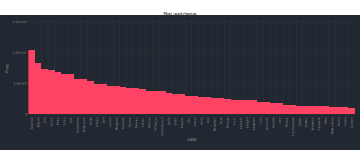

In [6]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :CharacterID, "Most used champs")

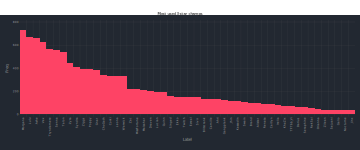

In [7]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 3, data)

plot_freq(data, :CharacterID, "Most used 3 star champs")

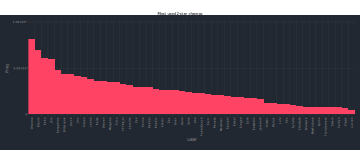

In [8]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 2, data)

plot_freq(data, :CharacterID, "Most used 2 star champs")

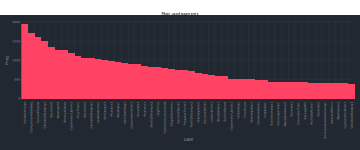

In [9]:
data = innerjoin(rd.augments, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Augment, "Most used augments")

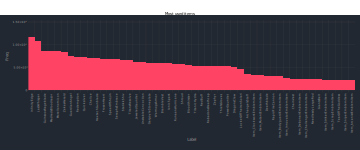

In [10]:
data = innerjoin(rd.items, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Item, "Most used items")

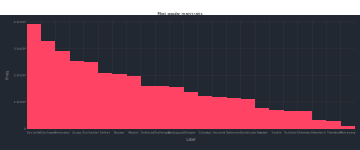

In [11]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent >= r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular main traits")

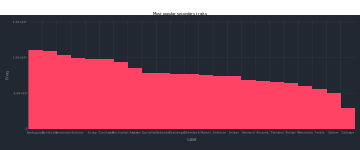

In [12]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent < r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular secondary traits")

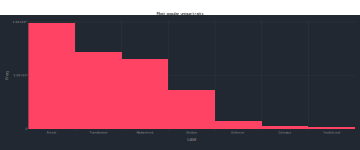

In [13]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierTotal == 1 , data)

plot_freq(data, :Trait, "Most popular unique traits")